In [1]:
import math as mt
import numpy as np
from matplotlib import pyplot as py
%matplotlib inline

In [2]:
# function for creating flow grid
def flowgrid (xstart, xend, ystart, yend, N):
    x = np.linspace(xstart,xend,N)
    y = np.linspace(ystart,yend,N)
    X,Y = np.meshgrid(x,y)
    return x,y,X,Y

In [3]:
N = 100
xstart, xend, ystart, yend = -5.0,5.0,-1.0,1.0
x,y,X,Y = flowgrid(xstart,xend,ystart,yend,N)

In [4]:
#function for vortex velocities and stream functions
def get_vel_psi_vortex(strength, xv, yv, X, Y):
    u = strength/(2*np.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = -strength/(2*np.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    psi = strength/(4*np.pi)*np.log((X-xv)**2+(Y-yv)**2)
    return u,v,psi

In [9]:
Nv = 20
gamma = 1.0
xvortex,yvortex = np.linspace(xstart,xend,Nv),np.linspace(0,0,Nv)
u_temp,v_temp,psi_temp = 0.0,0.0,0.0
u,v,psi = np.ndarray([N,N,Nv],dtype=float),np.ndarray([N,N,Nv],dtype=float),np.ndarray([N,N,Nv],dtype=float)
for i in range (Nv):
    u[:,:,i],v[:,:,i],psi[:,:,i] = get_vel_psi_vortex(gamma,xvortex[i],yvortex[i],X,Y)
    #u_vortex = u_vortex + u_temp
    #v_vortex = u_vortex + u_temp
    #psi_vortex = u_vortex + psi_temp

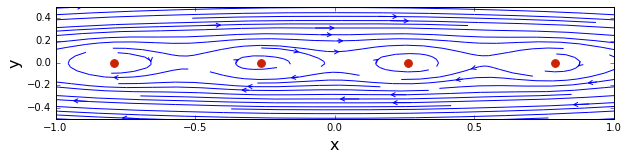

In [11]:
#U,V,psi = np.sum(u_vortex,axis=2),np.sum(v_vortex,axis=2),np.sum(psi_vortex,axis=2)
U,V = np.sum(u,axis=2),np.sum(v,axis=2)
#plotting
size = 10
py.figure(figsize = (size, (yend-ystart)/(xend - xstart)*size))
py.xlabel('x',fontsize = 16)
py.ylabel('y',fontsize = 16)
py.xlim(-1.,1.)
py.ylim(-0.5,0.5)
#py.xlim(xstart,xend)
#py.ylim(ystart,yend)
py.streamplot(X,Y,U,V, density = 2, linewidth=1, arrowsize=1, arrowstyle='->')
py.scatter(xvortex ,yvortex, color = '#CD2305', s=60, marker = 'o')